Saving student_data.csv to student_data (2).csv
Data after feature engineering and encoding:
    school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   goout  Dalc  Walc  health  absences  G1  G2  G3  family_edu  total_alcohol  
0      4     1     1       3         6   5   6   6           8              2  
1      3     1     1       3         4   5   5   6           2              2  
2      2     2     3       3        10   7   8  10           2              5  
3      2     1     1       5         2  15  14  15           6              2  
4      2     1     2       5   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

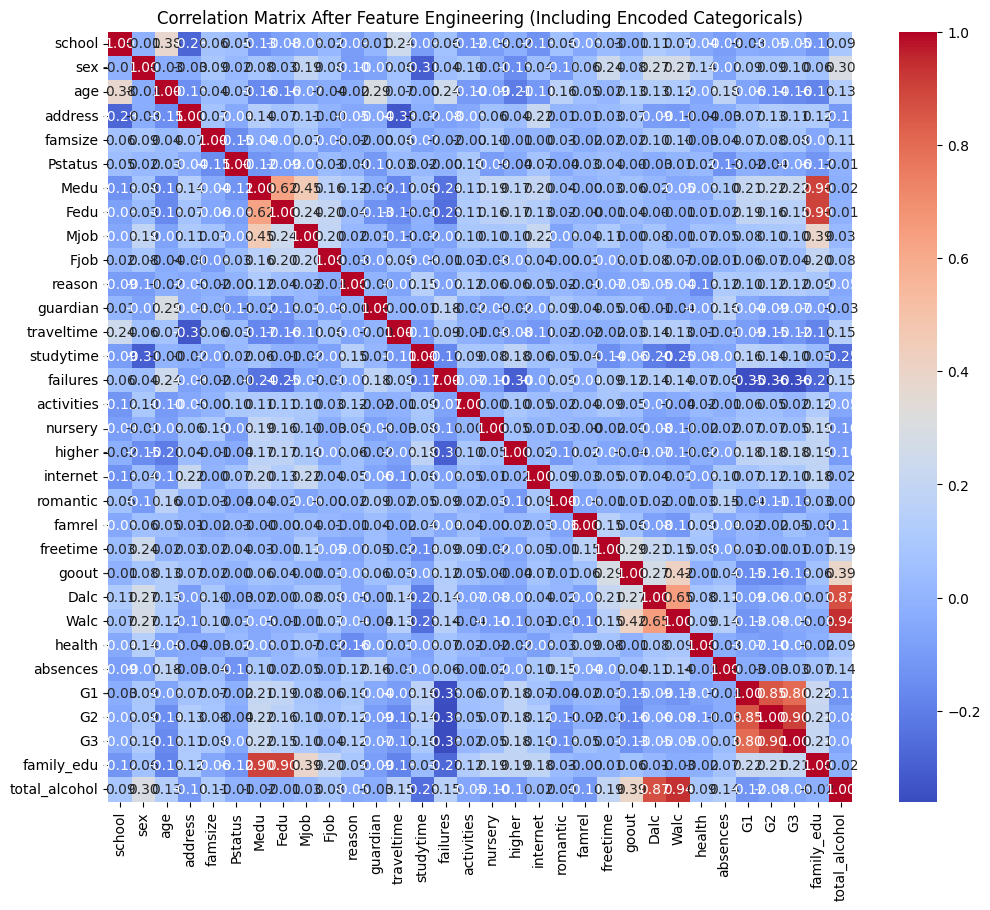

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('student_data.csv')

# Feature Engineering
df['family_edu'] = df['Medu'] + df['Fedu']
df['total_alcohol'] = df['Dalc'] + df['Walc']
# Optionally drop irrelevant columns (avoid dropping all strings)
df = df.drop(['schoolsup', 'famsup', 'paid'], axis=1, errors='ignore')

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("Data after feature engineering and encoding:\n", df.head())

# EDA Visualization: Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix After Feature Engineering (Including Encoded Categoricals)')
plt.savefig('corr_heatmap.png')
from google.colab import files
files.download('corr_heatmap.png')
plt.show()

# Save preprocessed data
df.to_csv('cleaned_student_data.csv', index=False)
files.download('cleaned_student_data.csv')